# Australian forecast skill

This notebook contains plots showing the skill of quantities averaged over the Natural Resource Management (NRM) super-cluster regions (see https://www.climatechangeinaustralia.gov.au/en/overview/methodology/nrm-regions/). As for the generic skill results, plots are shown for CAFE-f6 and for the CanESM5 and EC-Earth3 CMIP6 DCPP submissions (where possible). Refer to `Evaluation methods`_ for details of the hindcast evaluation methods.

Much of this work is motivated by deliverables for the Australian Climate Services (ACS) project. If you wish to see anything added to these results, please open an issue `here <https://github.com/dougiesquire/Squire_2022_CAFE-f6/issues>`_

In [1]:
import warnings

warnings.filterwarnings("ignore")

import geopandas

import xarray as xr

import matplotlib.pyplot as plt

from src import utils, plot

from notebook_helper import plot_metrics, plot_metric_maps, plot_hindcasts

In [2]:
%load_ext autoreload
%autoreload 2
%load_ext lab_black

## Focus regions
In the following we'll show some skill results for the following NRM super clusters and for the average over all of Australia. Note, the grid below shows the native CAFE grid.

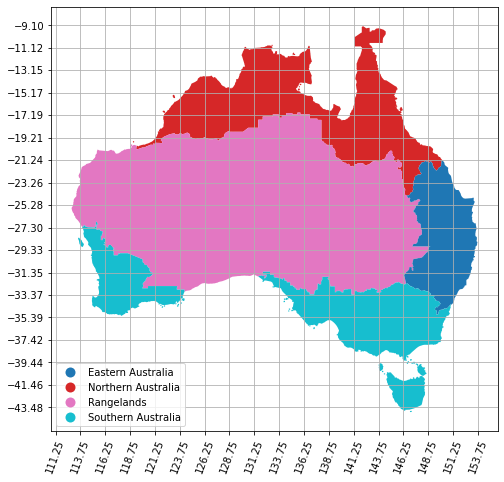

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
df = geopandas.read_file("../data/raw/NRM_super_clusters/NRM_super_clusters.shp")
_ = df.plot("label", ax=ax, legend=True, legend_kwds={"loc": "lower left"})

data = xr.open_zarr(
    "../data/processed/CAFE_hist.annual.days_over_0.ehf_severity_Aus.zarr"
)
ax.set_xticks(data.lon.values, labels=data.lon.values, rotation=70)
ax.set_yticks(data.lat.values)
ax.grid()

## Near-surface (2m) temperature relative to AGCD

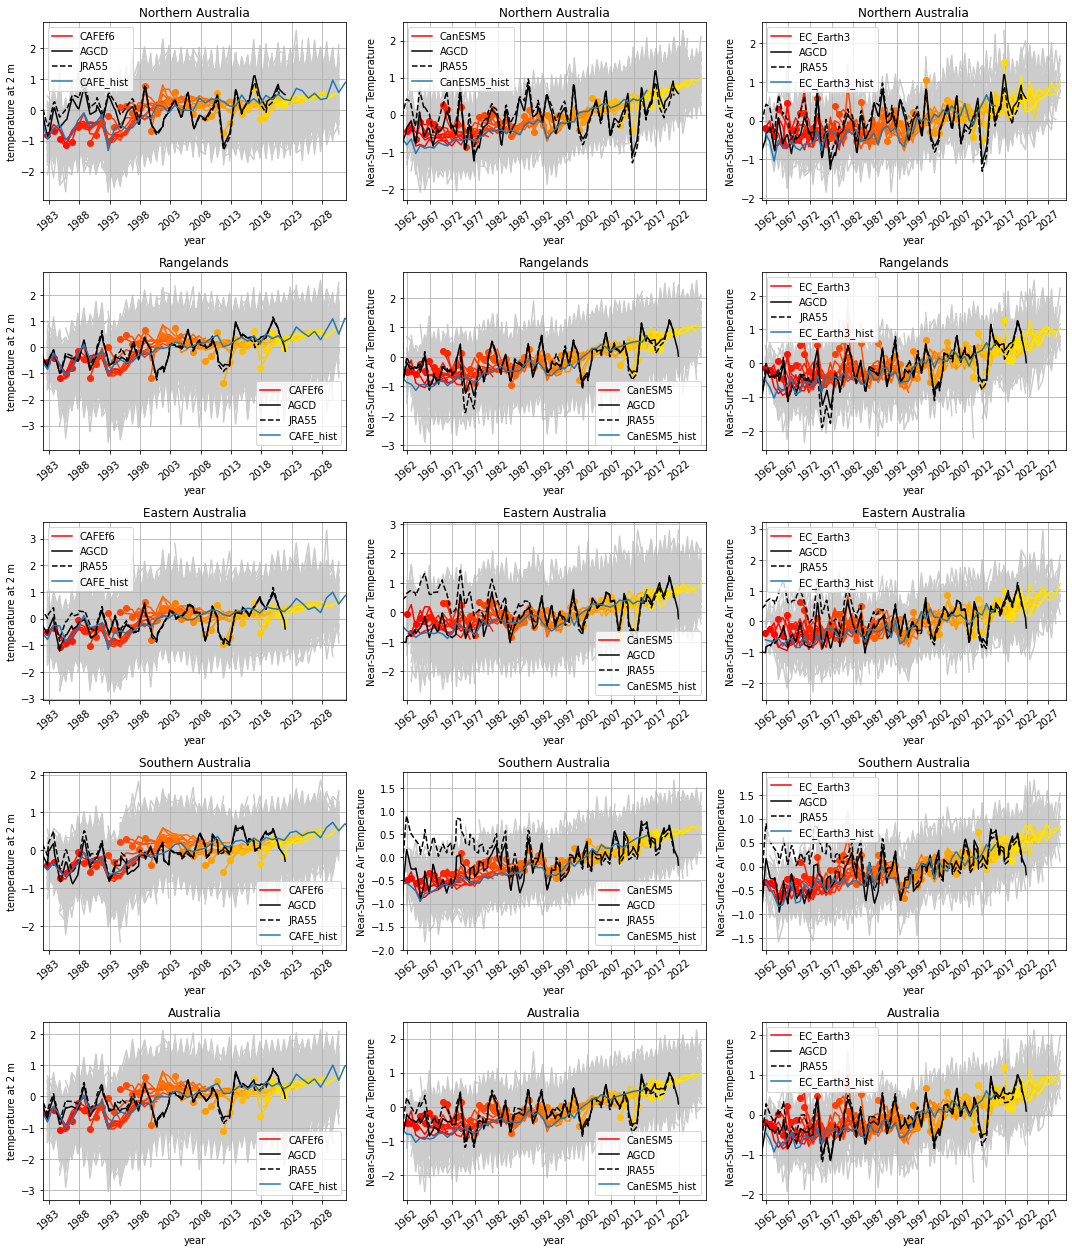

In [4]:
plot_hindcasts(
    ["CAFEf6", "CanESM5", "EC_Earth3"],
    ["CAFE_hist", "CanESM5_hist", "EC_Earth3_hist"],
    ["AGCD", "JRA55"],
    "annual",
    "t_ref",
    "Aus_NRM",
)

### Anomaly correlation coefficient (Pearson)

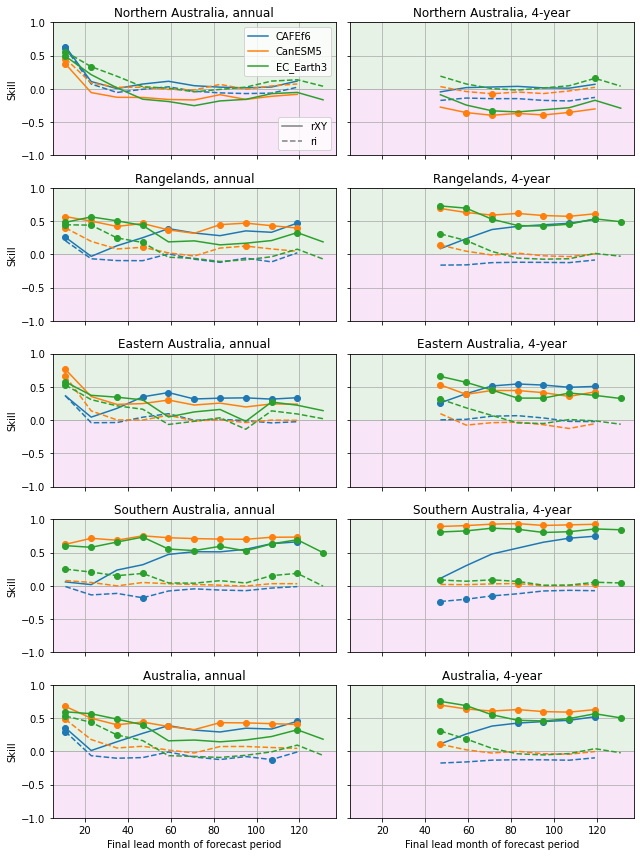

In [5]:
_ = plot_metrics(
    ["CAFEf6", "CanESM5", "EC_Earth3"],
    "AGCD",
    ["annual", "4-year"],
    "t_ref",
    ["rXY", "ri"],
    "Aus_NRM",
)

### Mean squared skill score

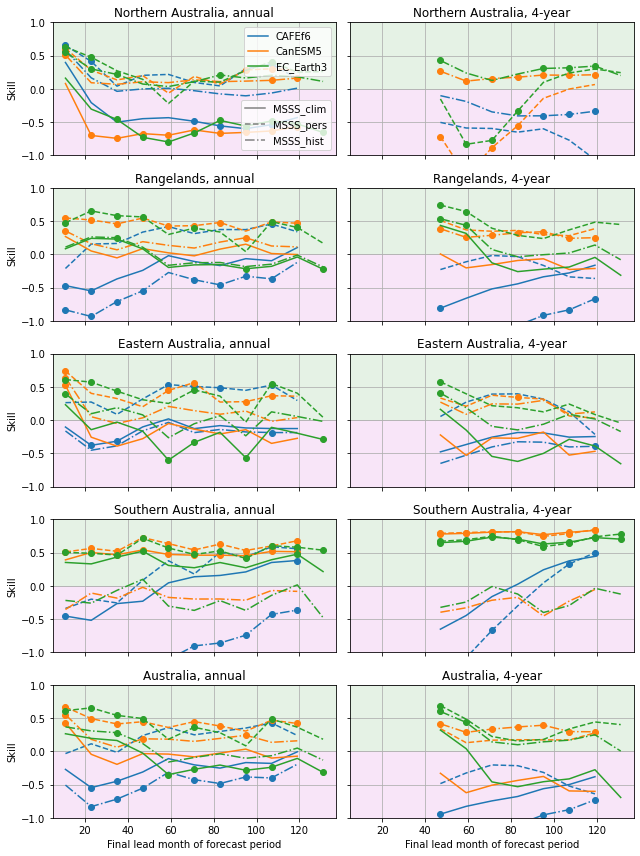

In [6]:
_ = plot_metrics(
    ["CAFEf6", "CanESM5", "EC_Earth3"],
    "AGCD",
    ["annual", "4-year"],
    "t_ref",
    ["MSSS_clim", "MSSS_pers", "MSSS_hist"],
    "Aus_NRM",
)

## Precipitation relative to AGCD

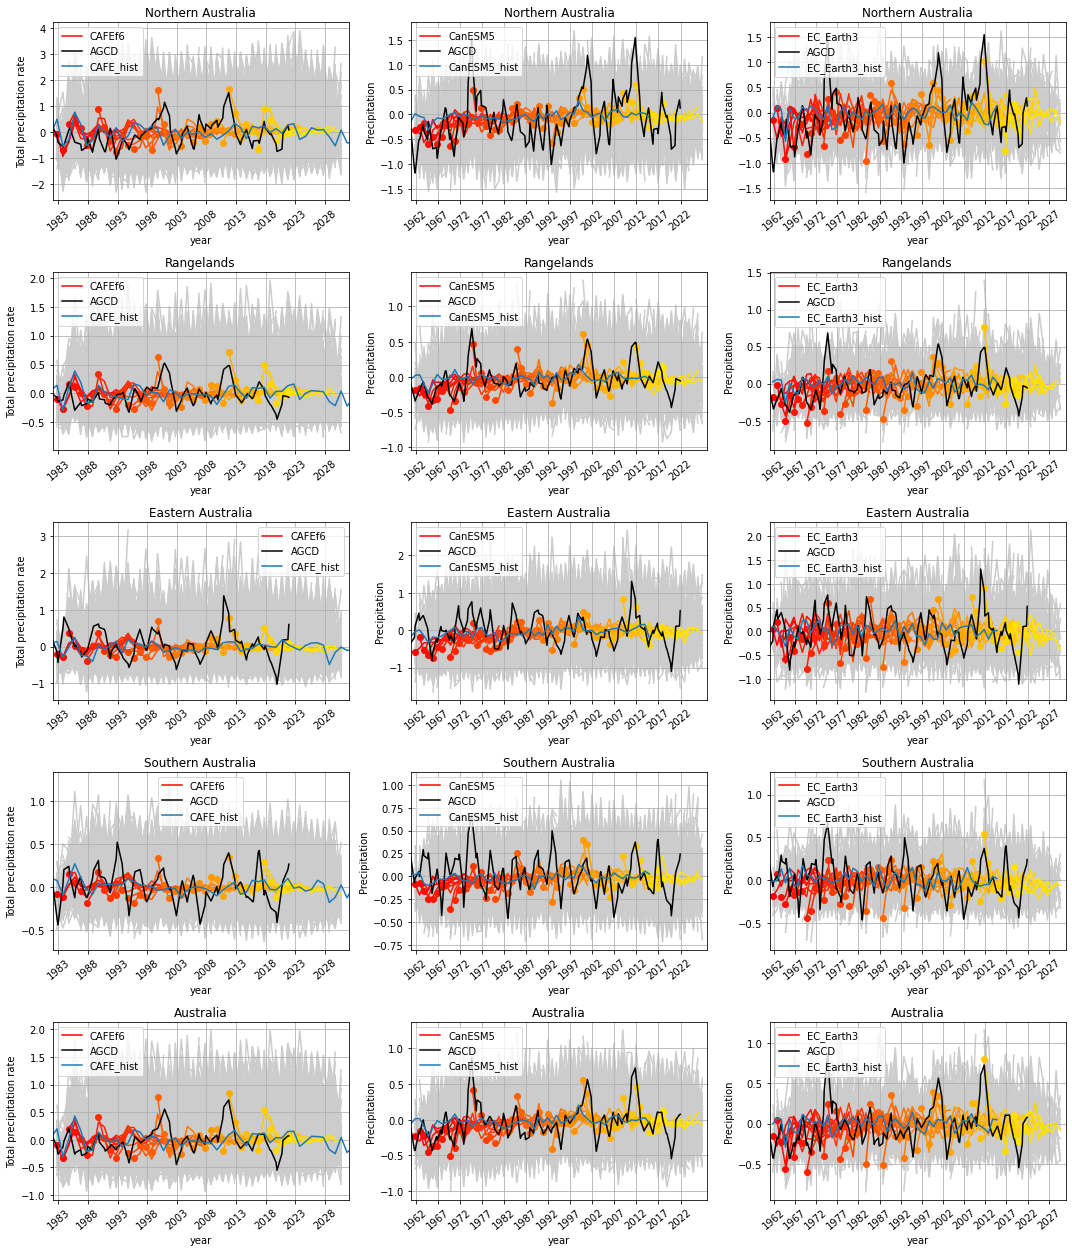

In [7]:
plot_hindcasts(
    ["CAFEf6", "CanESM5", "EC_Earth3"],
    ["CAFE_hist", "CanESM5_hist", "EC_Earth3_hist"],
    ["AGCD"],
    "annual",
    "precip",
    "Aus_NRM",
)

### Anomaly correlation coefficient (Pearson)

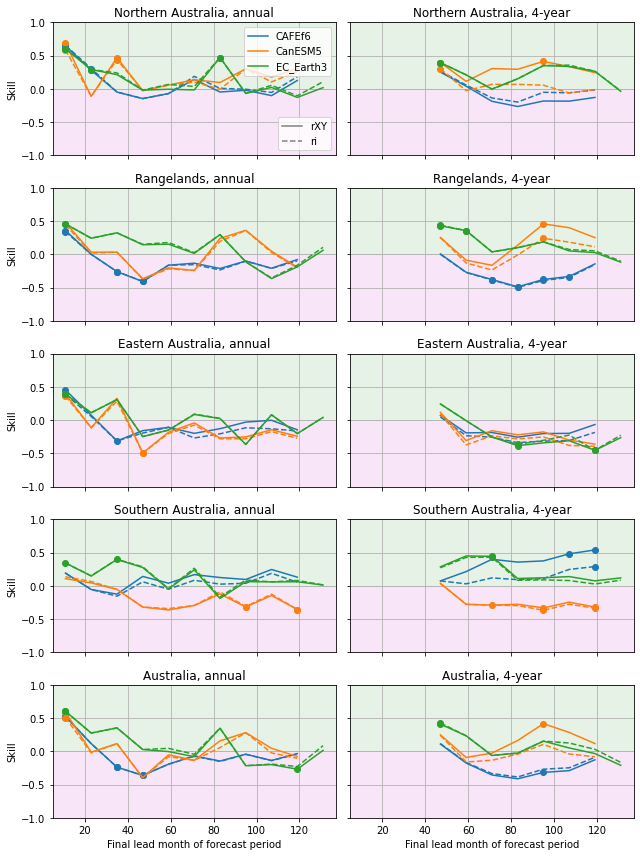

In [8]:
_ = plot_metrics(
    ["CAFEf6", "CanESM5", "EC_Earth3"],
    "AGCD",
    ["annual", "4-year"],
    "precip",
    ["rXY", "ri"],
    "Aus_NRM",
)

### Mean squared skill score

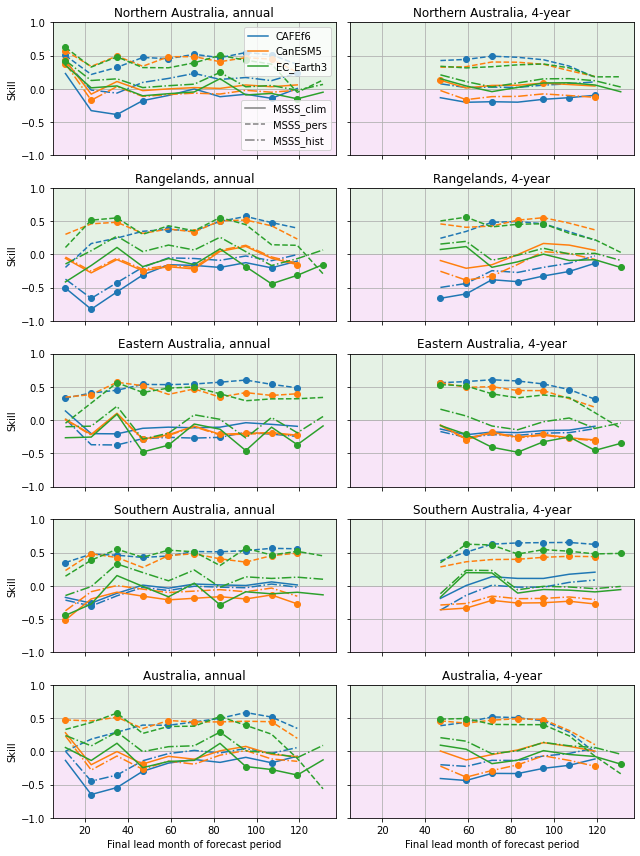

In [9]:
_ = plot_metrics(
    ["CAFEf6", "CanESM5", "EC_Earth3"],
    "AGCD",
    ["annual", "4-year"],
    "precip",
    ["MSSS_clim", "MSSS_pers", "MSSS_hist"],
    "Aus_NRM",
)

## Near-surface (10m) wind relative to JRA55

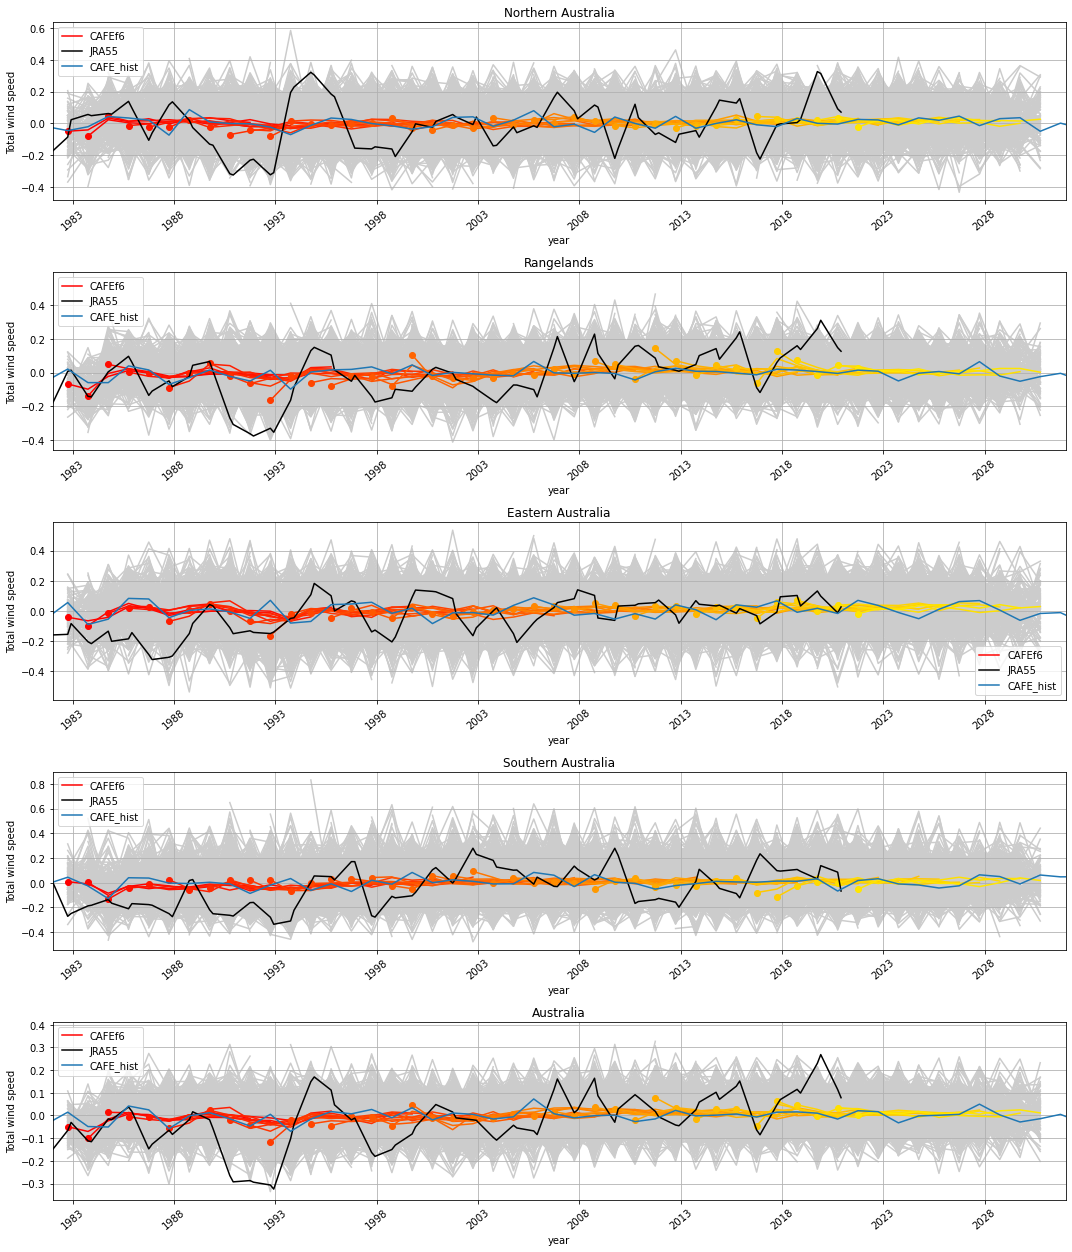

In [10]:
plot_hindcasts(["CAFEf6"], ["CAFE_hist"], ["JRA55"], "annual", "V_tot", "Aus_NRM")

### Anomaly correlation coefficient (Pearson)

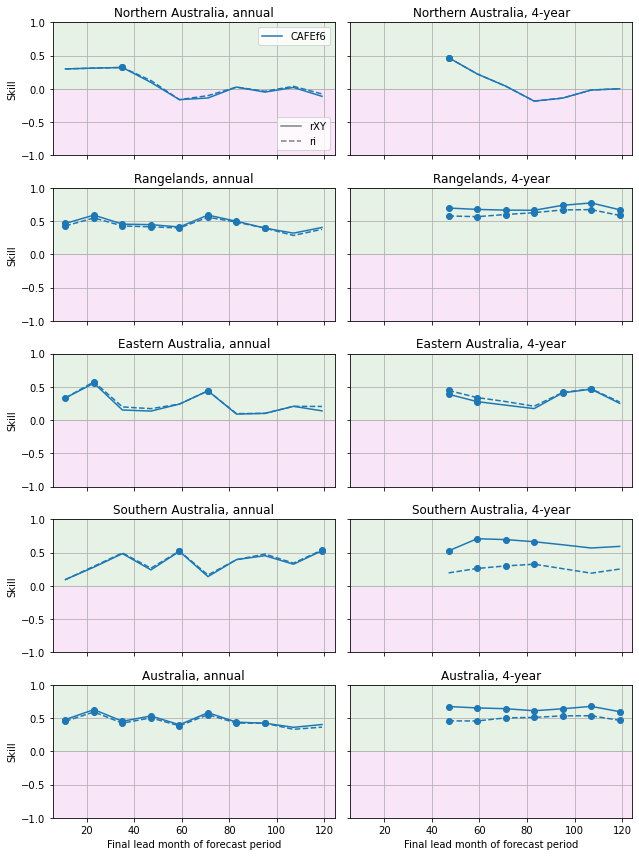

In [11]:
_ = plot_metrics(
    ["CAFEf6"], "JRA55", ["annual", "4-year"], "V_tot", ["rXY", "ri"], "Aus_NRM"
)

### Mean squared skill score

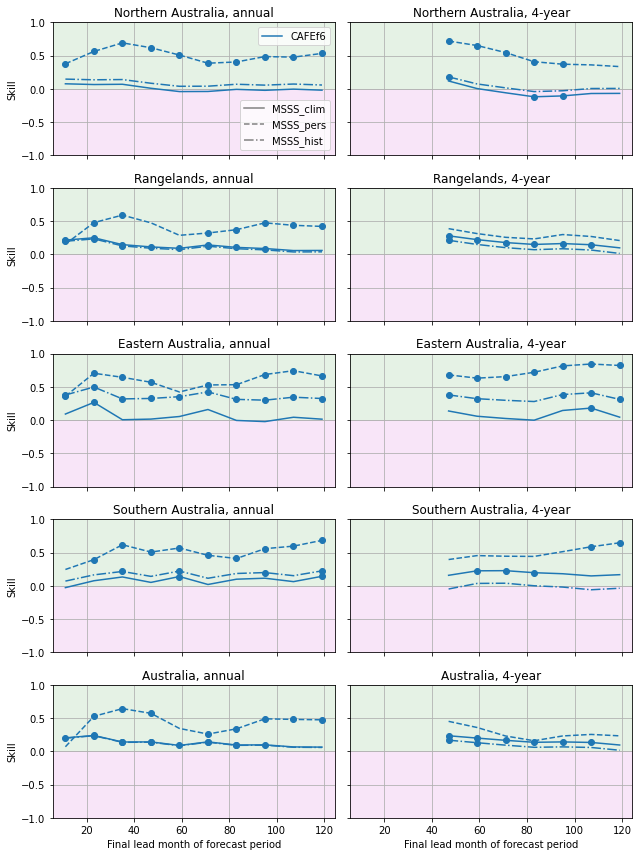

In [12]:
_ = plot_metrics(
    ["CAFEf6"],
    "JRA55",
    ["annual", "4-year"],
    "V_tot",
    ["MSSS_clim", "MSSS_pers", "MSSS_hist"],
    "Aus_NRM",
)

## Extreme 2m temperature relative to AGCD

Here we assess the proportion of days in forecast period with maximum temperature over 90th percentile percentile. Percentile thresholds for each day-of-year are determined for each dataset from its own climatology over the period 1991-2020. In the case of hindcast data, percentile thresholds are determined for each lead time independently. All instances of Feb 29th are removed for all datasets to simplify processing.  

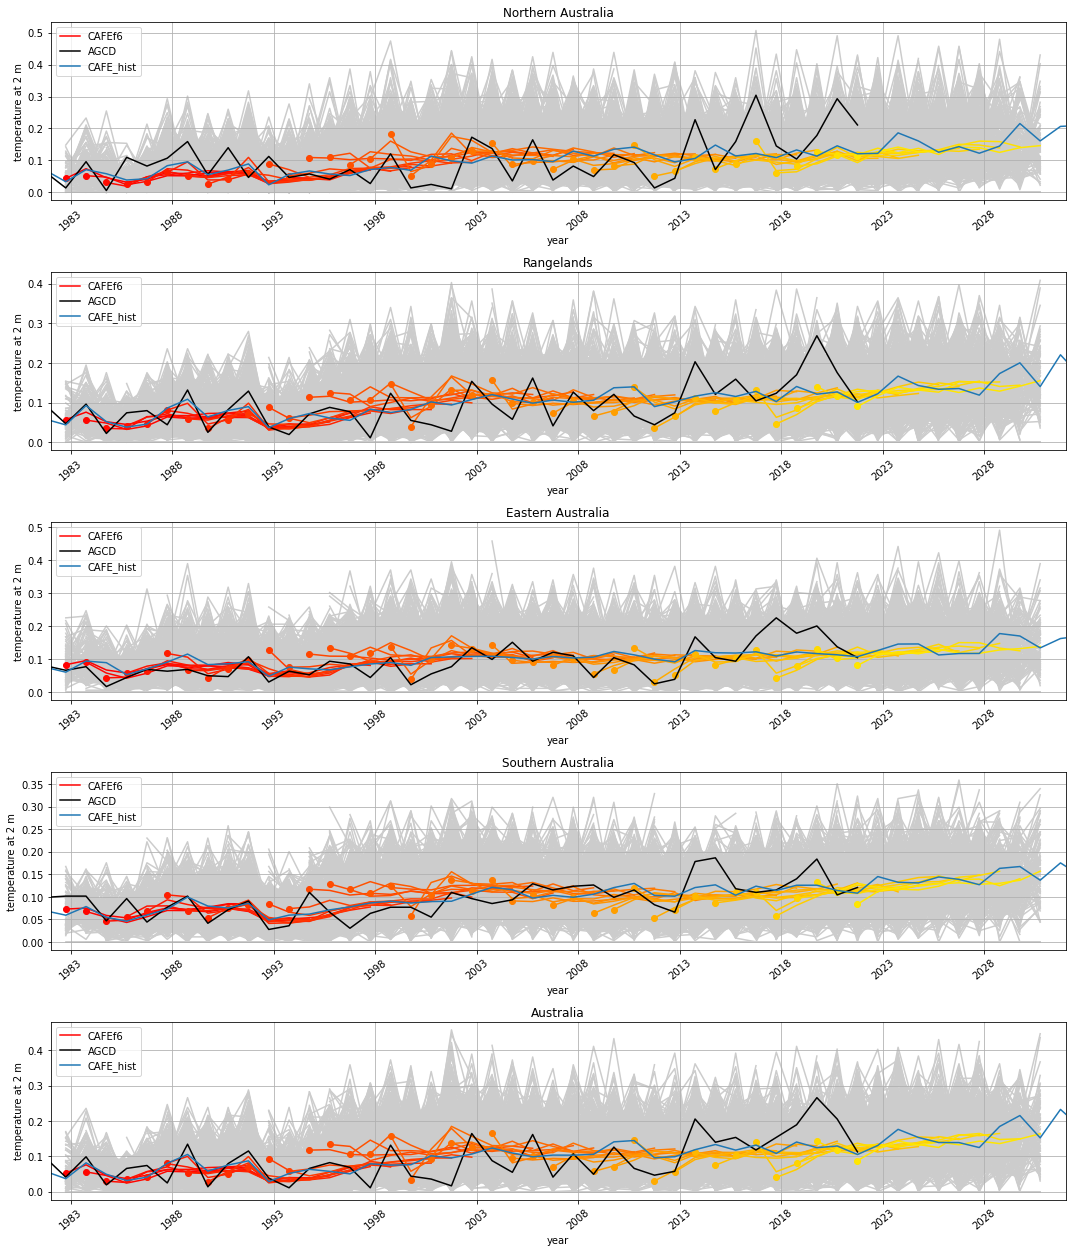

In [13]:
plot_hindcasts(
    ["CAFEf6"],
    ["CAFE_hist"],
    ["AGCD"],
    "annual",
    "t_ref_max",
    "Aus_NRM",
    "days_over_p90",
)

### Anomaly correlation coefficient (Spearman)

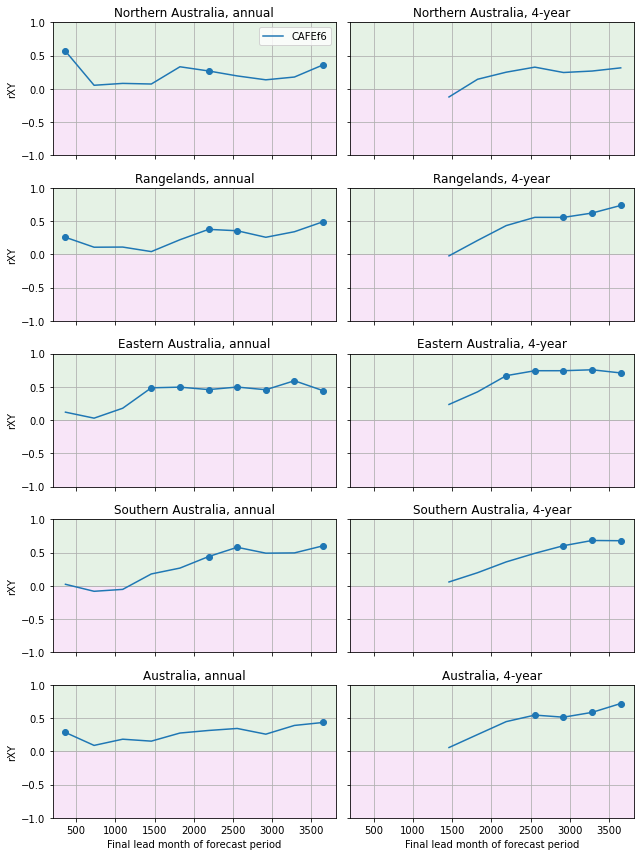

In [14]:
_ = plot_metrics(
    ["CAFEf6"],
    "AGCD",
    ["annual", "4-year"],
    "t_ref_max",
    ["rXY"],
    "Aus_NRM",
    "days_over_p90",
)

### Mean squared skill score

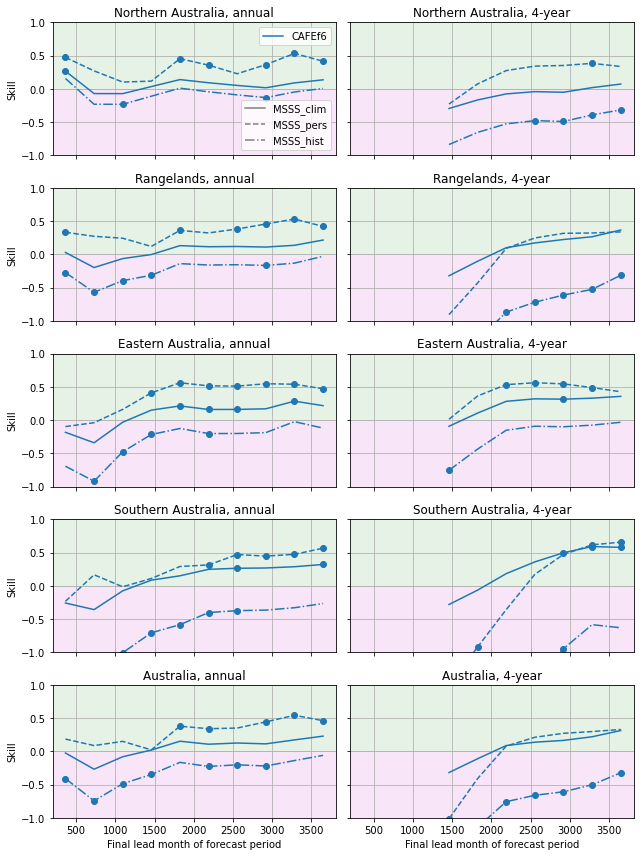

In [15]:
_ = plot_metrics(
    ["CAFEf6"],
    "AGCD",
    ["annual", "4-year"],
    "t_ref_max",
    ["MSSS_clim", "MSSS_pers", "MSSS_hist"],
    "Aus_NRM",
    "days_over_p90",
)

## Extreme precipitation relative to AGCD

Here we assess the proportion of days in forecast period with precipitation over 90th percentile percentile. Percentile thresholds for each day-of-year are determined for each dataset from its own climatology over the period 1991-2020. In the case of hindcast data, percentile thresholds are determined for each lead time independently. All instances of Feb 29th are removed for all datasets to simplify processing.  

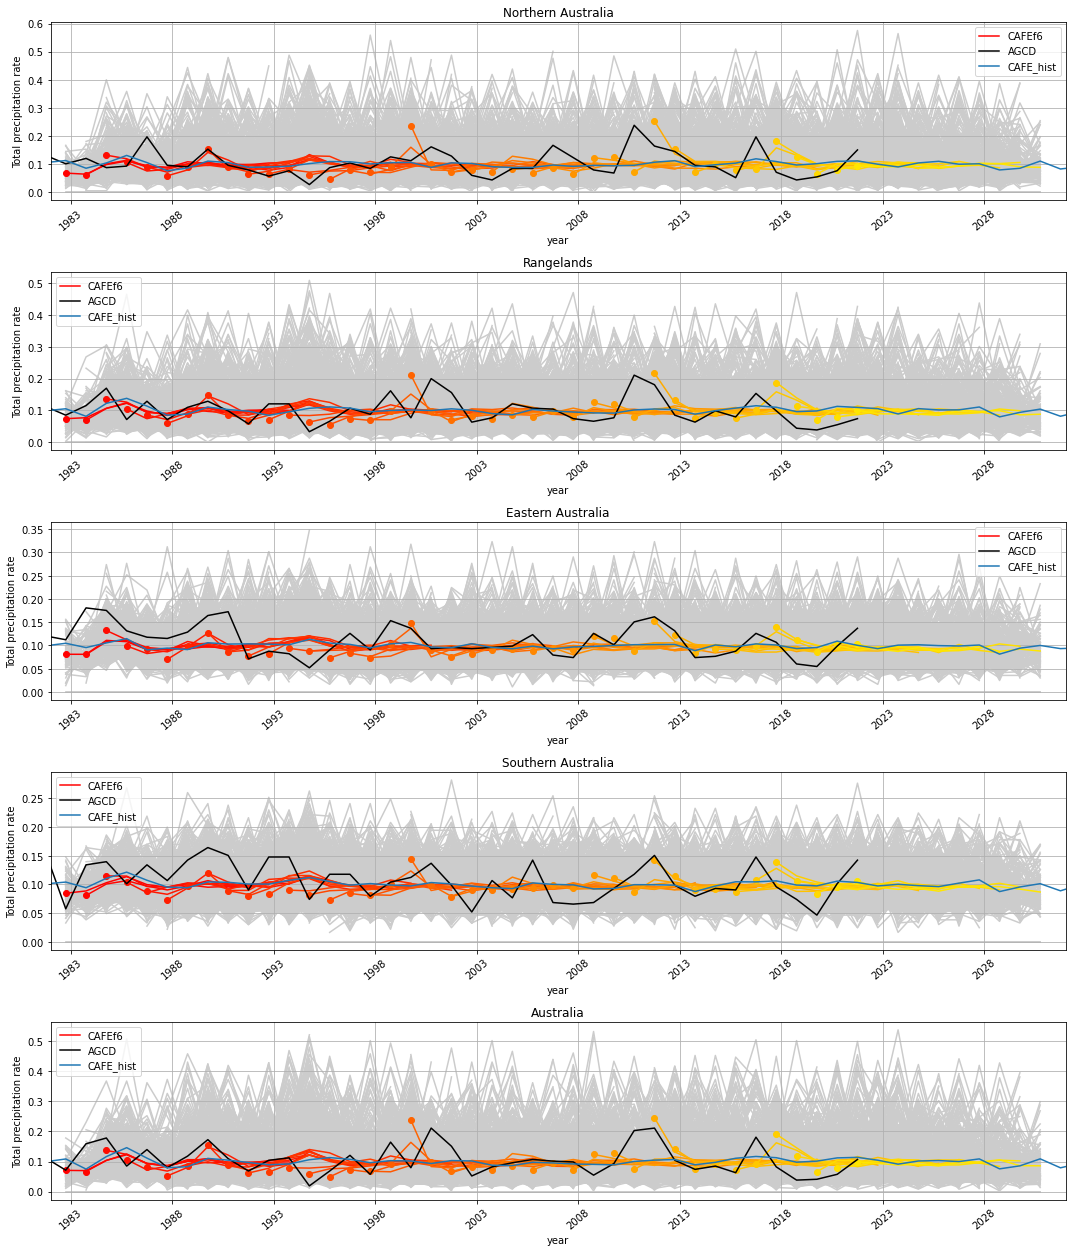

In [16]:
plot_hindcasts(
    ["CAFEf6"],
    ["CAFE_hist"],
    ["AGCD"],
    "annual",
    "precip",
    "Aus_NRM",
    "days_over_p90",
)

### Anomaly correlation coefficient (Spearman)

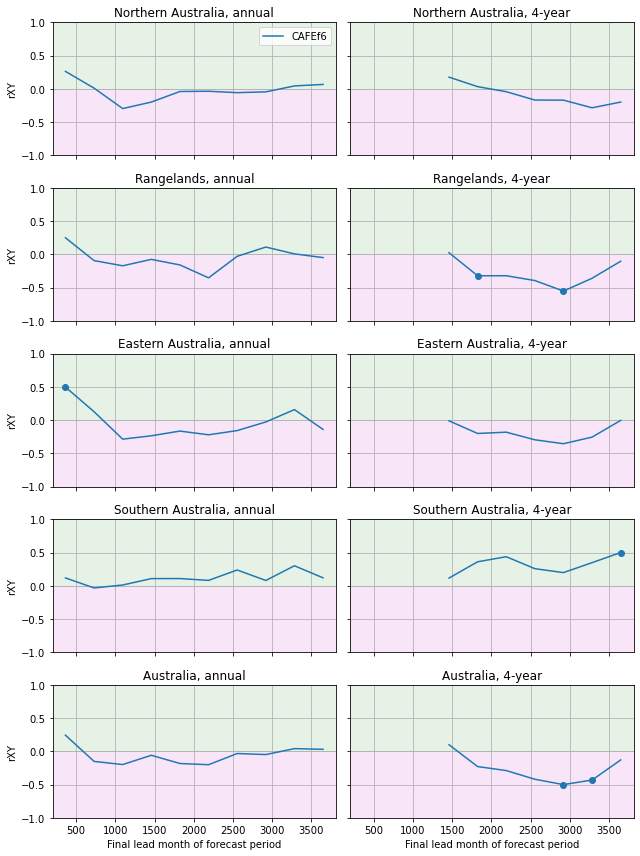

In [17]:
_ = plot_metrics(
    ["CAFEf6"],
    "AGCD",
    ["annual", "4-year"],
    "precip",
    ["rXY"],
    "Aus_NRM",
    "days_over_p90",
)

### Mean squared skill score

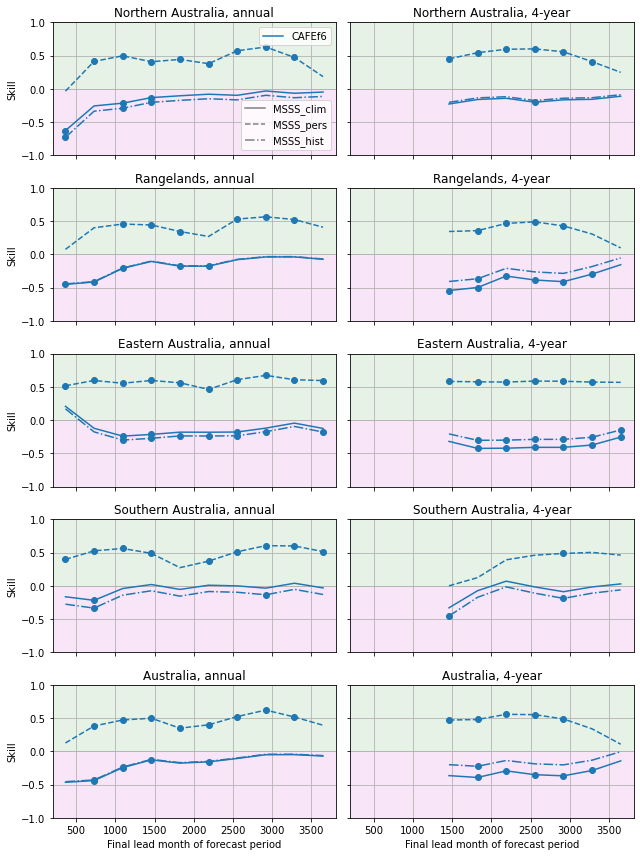

In [18]:
_ = plot_metrics(
    ["CAFEf6"],
    "AGCD",
    ["annual", "4-year"],
    "precip",
    ["MSSS_clim", "MSSS_pers", "MSSS_hist"],
    "Aus_NRM",
    "days_over_p90",
)

## Extreme Forest Fire Danger Index relative to JRA55

Here we assess the proportion of days in forecast period with FFDI over 90th percentile percentile. Percentile thresholds for each day-of-year are determined for each dataset from its own climatology over the period 1991-2020. In the case of hindcast data, percentile thresholds are determined for each lead time independently. All instances of Feb 29th are removed for all datasets to simplify processing.  

Note that FFDI is calculated in a non-standard way here due to data availability (see Richardson et al. 2021 and Squire et al. 2021):

 - At the moment, the drought factor is estimated as the 20-day accumulated rainfall normalised to lie between 0 and 10, with larger values indicating less precipitation. This tends to underpredict the number of very low FFDU days, but produces similar extreme values. The normalisation is carried out over all initial dates, lead times and ensemble members in the training period. This approach ensures that all days-of-year are included in the normalisation, however it does not account for lead-time dependent bias in precipitation.
 - We use daily mean relative humidity at 1000 hPa rather than daily max relative humidity at 2m
 - We use daily mean wind speed at 10m rather than daily max wind speed

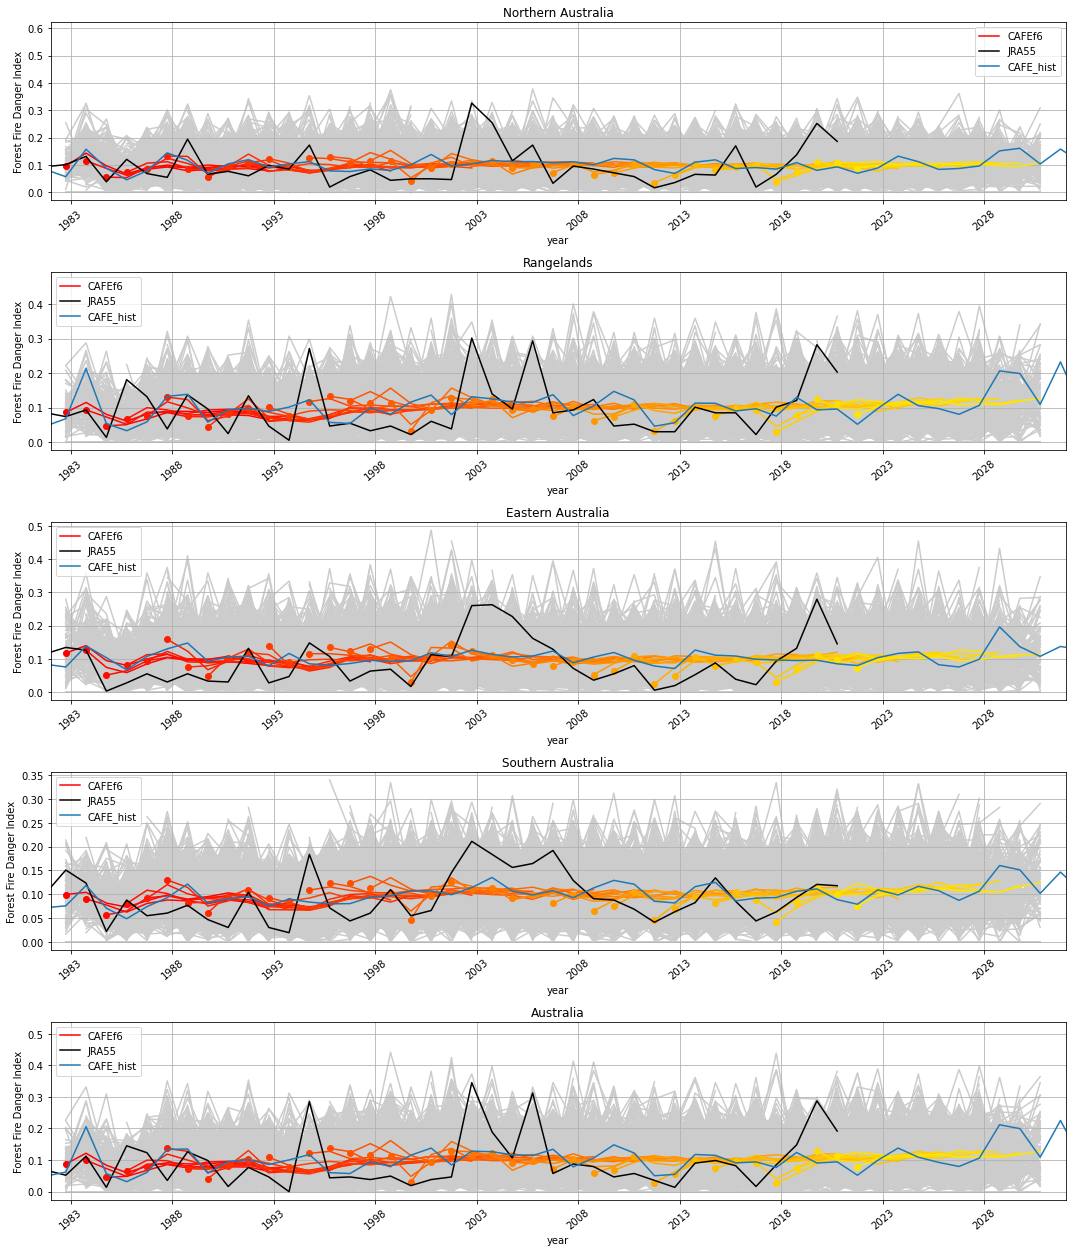

In [19]:
plot_hindcasts(
    ["CAFEf6"],
    ["CAFE_hist"],
    ["JRA55"],
    "annual",
    "ffdi",
    "Aus_NRM",
    "days_over_p90",
)

### Anomaly correlation coefficient (Spearman)

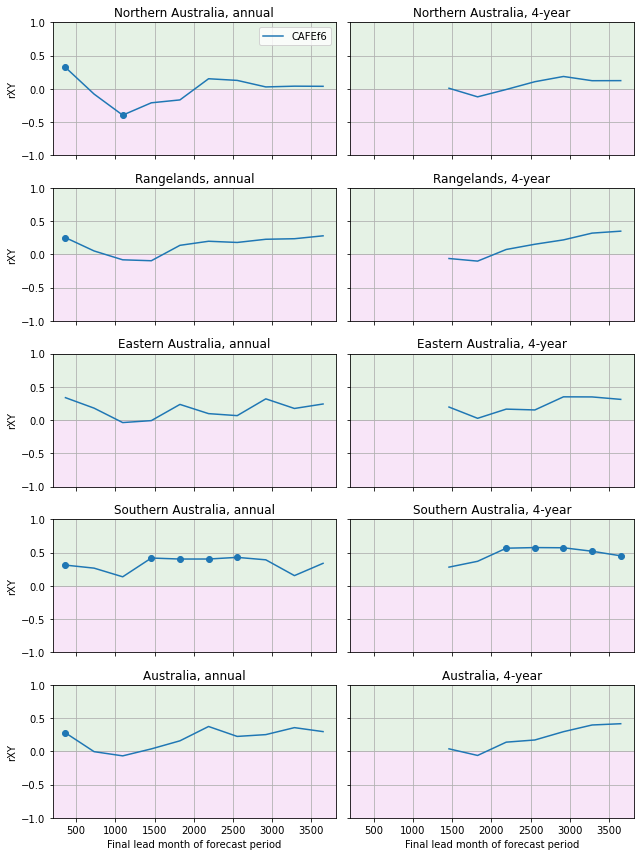

In [20]:
_ = plot_metrics(
    ["CAFEf6"],
    "JRA55",
    ["annual", "4-year"],
    "ffdi",
    ["rXY"],
    "Aus_NRM",
    "days_over_p90",
)

### Mean squared skill score

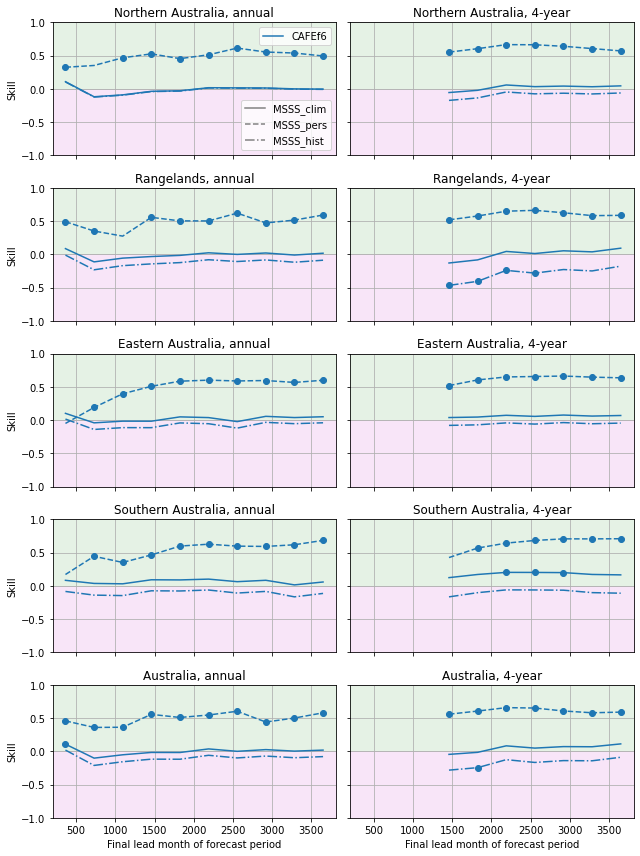

In [21]:
_ = plot_metrics(
    ["CAFEf6"],
    "JRA55",
    ["annual", "4-year"],
    "ffdi",
    ["MSSS_clim", "MSSS_pers", "MSSS_hist"],
    "Aus_NRM",
    "days_over_p90",
)

## Drought relative to AGCD

Here a drought event is defined as when rainfall over a 3-month period is in the lowest decile (this is the Bureau of Meteorology definition, see https://link.springer.com/article/10.1007/s00382-020-05235-0). We assess the proportion of 3-month periods in forecast period with precip within the first decile (equivalent to assessing the number of droughts in the forecast period). Note that the 3-month rainfall is not calculated in a rolling manner. Thus the max number of droughts in a year, for example, is 4. Percentile thresholds for each 3-month period are determined for each dataset from its own climatology over the period 1991-2020. In the case of hindcast data, percentile thresholds are determined for each lead time independently.

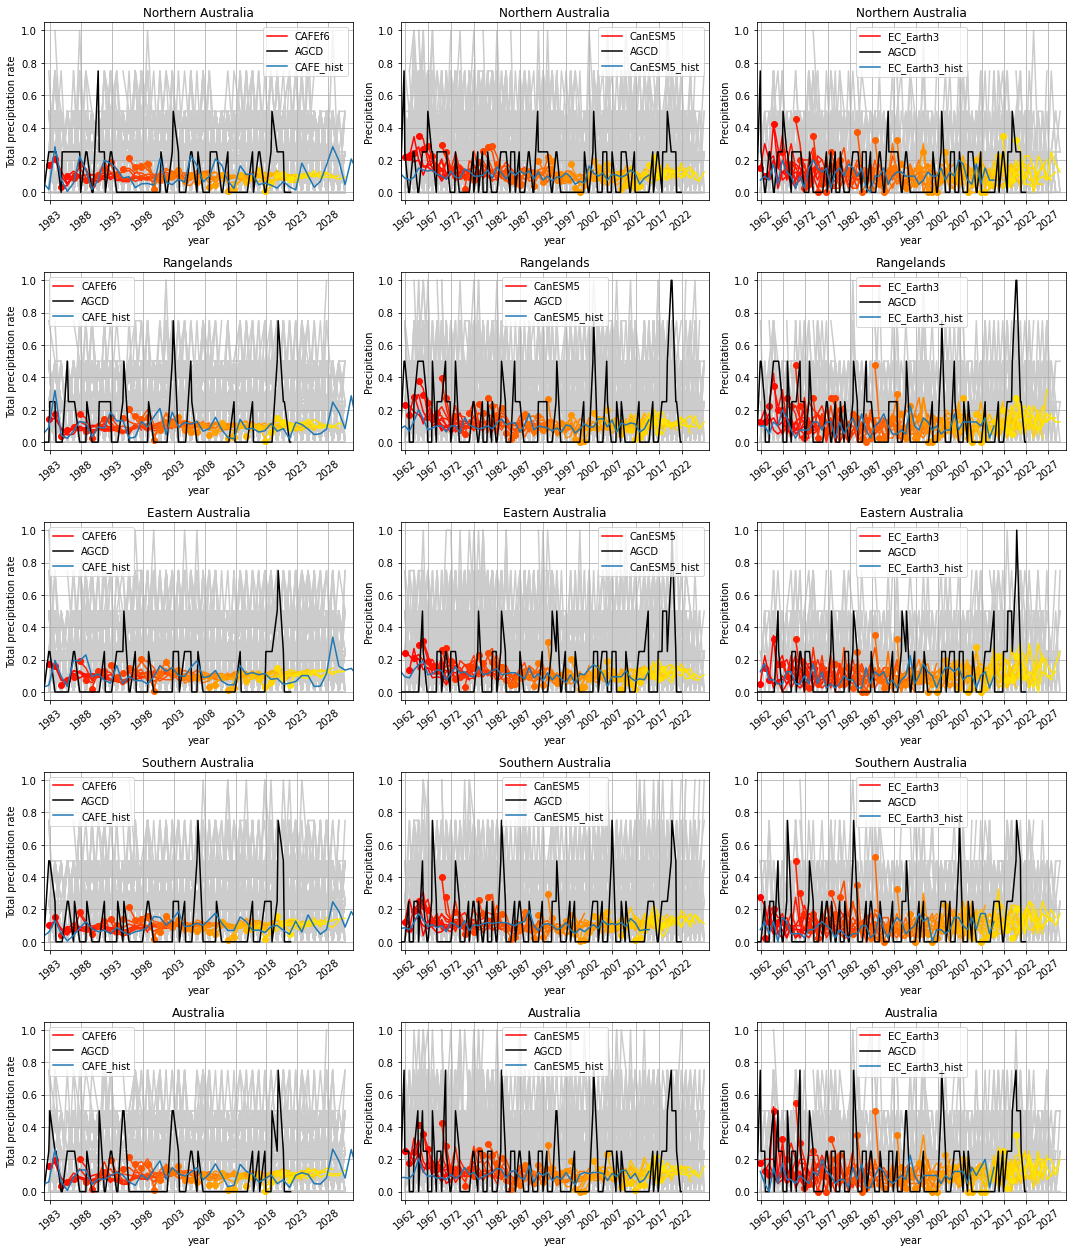

In [22]:
plot_hindcasts(
    ["CAFEf6", "CanESM5", "EC_Earth3"],
    ["CAFE_hist", "CanESM5_hist", "EC_Earth3_hist"],
    ["AGCD"],
    "annual",
    "precip",
    "Aus_NRM",
    "3-months_under_p10",
)

### Anomaly correlation coefficient (Spearman)

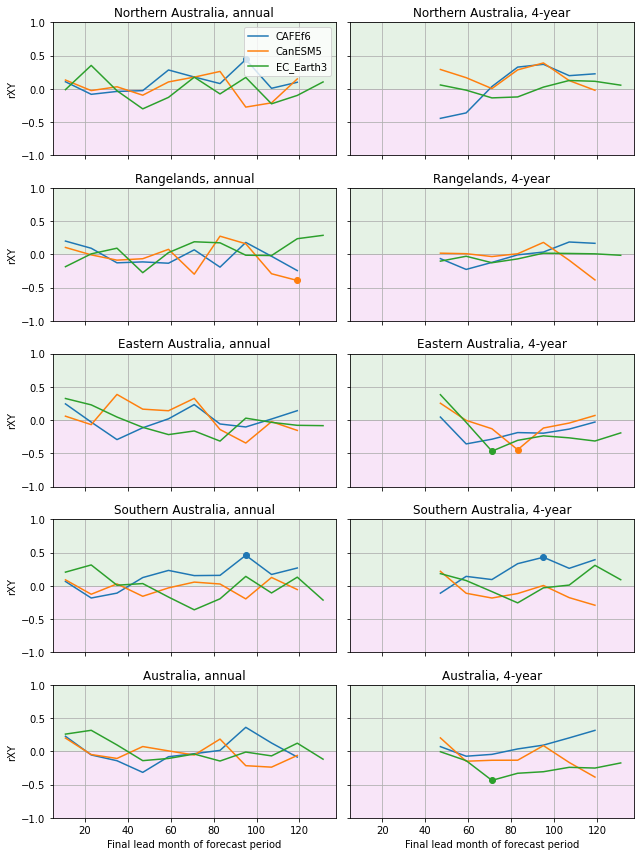

In [23]:
_ = plot_metrics(
    ["CAFEf6", "CanESM5", "EC_Earth3"],
    "AGCD",
    ["annual", "4-year"],
    "precip",
    ["rXY"],
    "Aus_NRM",
    "3-months_under_p10",
)

### Mean squared skill score

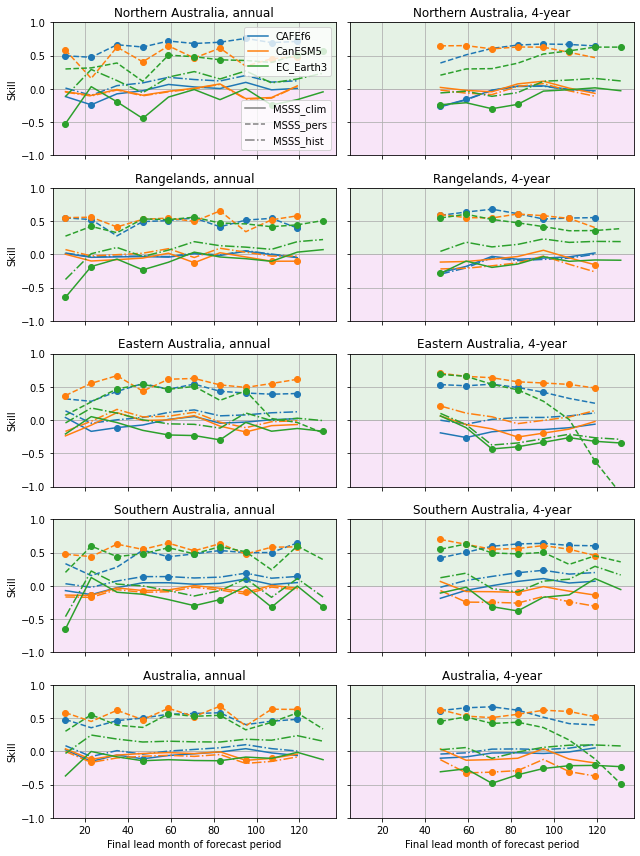

In [24]:
_ = plot_metrics(
    ["CAFEf6", "CanESM5", "EC_Earth3"],
    "AGCD",
    ["annual", "4-year"],
    "precip",
    ["MSSS_clim", "MSSS_pers", "MSSS_hist"],
    "Aus_NRM",
    "3-months_under_p10",
)

## Excess Heat Factor severity relative to AGCD

Here, the excess heat factor (EHF) is calculated following Nairn and Fawcett, 2015 (https://www.mdpi.com/1660-4601/12/1/227/htm). To compute the EHF for the hindcasts, the daily temperature forecasts are first (additive) bias corrected over the verification period (1991-2020) relative to AGCD. The same is also true for the historical model data. The temperature and EHF percentiles used in the calculation of the hindcast/historical run EHF severity (T_95 and EHF_85) are calculated from AGCD over the Nairn and Fawcett periods: 1971-2000 and 1958-2011, respectively. Below we assess the proportion of days in forecast period with EHF severity over 0 (0-1: low-intensity heatwave; 1-3: severe but not extreme heatwave; > 3: extreme heatwave).

We present the following on the native CAFE grid since aggregation to larger regions presents issues with interpreting the magnitude of the EHF.

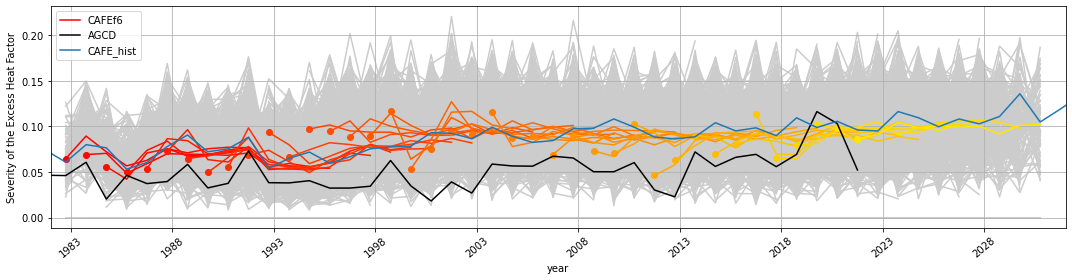

In [25]:
plot_hindcasts(
    ["CAFEf6"], ["CAFE_hist"], ["AGCD"], "annual", "ehf_severity", "Aus", "days_over_0"
)

### Anomaly correlation coefficient (Spearman)

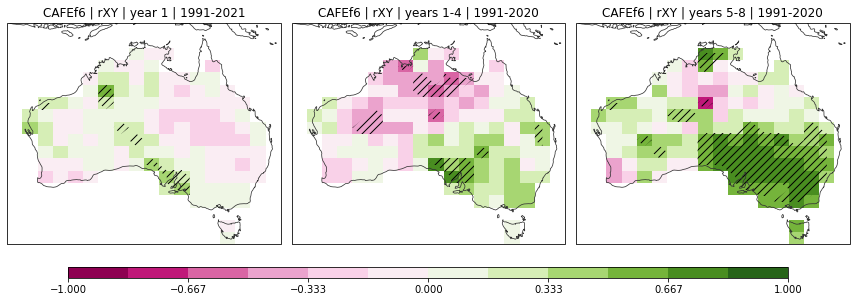

In [40]:
_ = plot_metric_maps(
    ["CAFEf6"],
    "AGCD",
    "ehf_severity",
    "rXY",
    "Aus",
    "days_over_0",
    figsize=(12, 4),
)

### Mean squared skill score relative to climatology

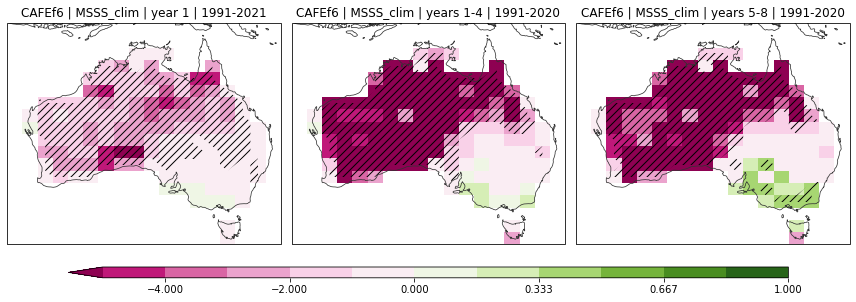

In [37]:
_ = plot_metric_maps(
    ["CAFEf6"],
    "AGCD",
    "ehf_severity",
    "MSSS_clim",
    "Aus",
    "days_over_0",
    vrange=(-5, 1),
    figsize=(12, 4),
)

### Mean squared skill score relative to persistence

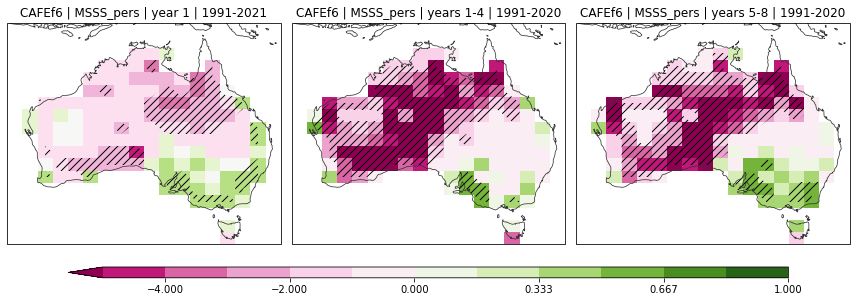

In [30]:
_ = plot_metric_maps(
    ["CAFEf6"],
    "AGCD",
    "ehf_severity",
    "MSSS_pers",
    "Aus",
    "days_over_0",
    vrange=(-5, 1),
    figsize=(12, 4),
)

### Mean squared skill score relative to historical simulations

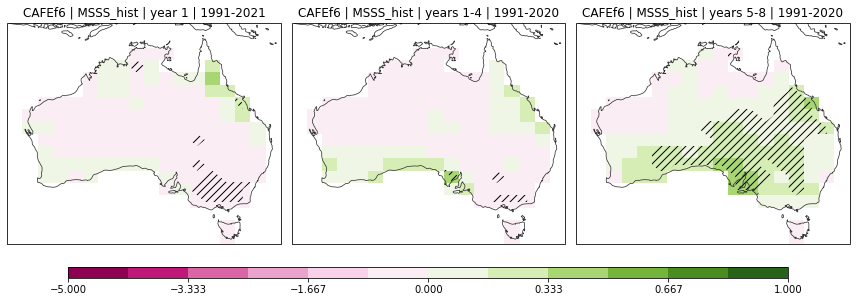

In [31]:
EHF_fig = plot_metric_maps(
    ["CAFEf6"],
    "AGCD",
    "ehf_severity",
    "MSSS_hist",
    "Aus",
    "days_over_0",
    vrange=(-5, 1),
    figsize=(12, 4),
)

### Where is the MSSS positive relative to climatology, persistence and historical simulations?
Lighter green indicates both are positive; darker green indicates both are positive and significant

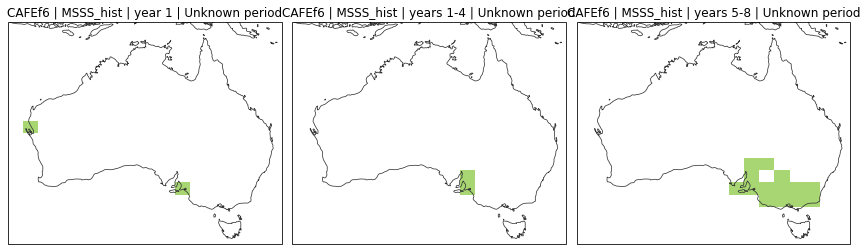

In [32]:
EHF_fig = plot_metric_maps(
    ["CAFEf6"],
    "AGCD",
    "ehf_severity",
    ["MSSS_clim", "MSSS_pers", "MSSS_hist"],
    "Aus",
    "days_over_0",
    figsize=(12, 4),
)

### Annual hindcasts for the Adelaide grid box

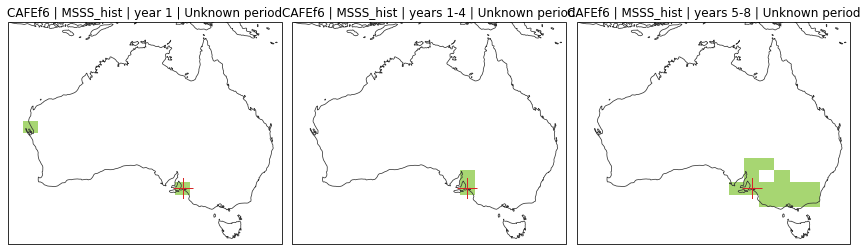

In [33]:
loc = [138.75, -35.39]


def plot_loc(ax, loc):
    import cartopy.crs as ccrs

    ax.plot(
        loc[0], loc[1], "C3", marker="+", markersize=20, transform=ccrs.PlateCarree()
    )


for ax in EHF_fig.axes:
    plot_loc(ax, loc)

EHF_fig

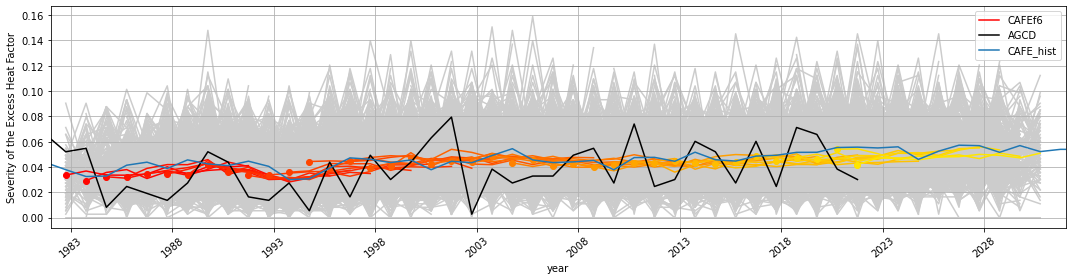

In [35]:
hcst = (
    xr.open_zarr("../data/processed/CAFEf6.annual.days_over_0.ehf_severity_Aus.zarr")
    .sel(lon=loc[0], lat=loc[1], method="nearest")
    .compute()
)
hist = (
    xr.open_zarr("../data/processed/CAFE_hist.annual.days_over_0.ehf_severity_Aus.zarr")
    .sel(lon=loc[0], lat=loc[1], method="nearest")
    .compute()
)
obsv = (
    xr.open_zarr("../data/processed/AGCD.annual.days_over_0.ehf_severity_Aus.zarr")
    .sel(lon=loc[0], lat=loc[1], method="nearest")
    .compute()
)

_ = plot.hindcasts({"CAFEf6": hcst}, {"AGCD": obsv}, {"CAFE_hist": hist})